# Importing Packages

In [ ]:
import random
random.seed(0) 

<!-- random.seed(any integer) For generating the same values everytime we execute. -->

In [ ]:
import numpy as np  # Contains multi-dims array and matrix DS. For performing number of maths operations on array.
import pandas as pd # data analysis and manipulation tool
import matplotlib.pyplot as plt #plotting library build with the help of Numpy, Pandas.
import seaborn as sns # plotting tool build on matplotlib
import plotly.express as px #plotting interactive plots
import time #different ways of representing time, waiting time during code execution.
from scipy.stats import mode #extension to numpy for scientific computations - statistics.

In [ ]:
#scikit-learn is a Machine Learning library
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, FastICA
from sklearn import linear_model, svm, metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

<!-- 1) StandardScaler(copy=True, with_mean = True, with_std = True). Formula is  z=(x - mean)/std -scaling to unit variance.
parameters are :

* If with_mean = False then mean=0 in above formula
* If with_std = False then std = 1 in above formula
* If copy = False then for inplace scaling

2) LabelEncoder( No params ) - Encodes target label to [0, n_classes-1]

3) Manifold for non linear dimensionality reduction. 

*   In Linear dimensionality reduction - linear transformations like shifting and stretching the data.
.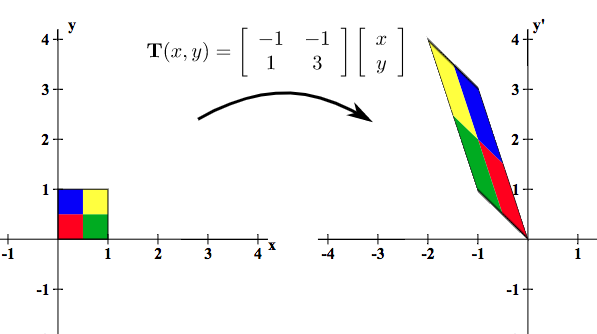

*   in Non Linear dim reduction - more dramatic changes like making data inside out.

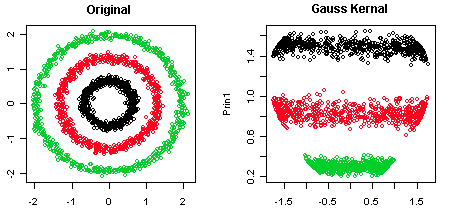


 -->


# Looking into Dataset

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/train.csv", na_values=' ')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/test.csv", na_values=' ')

In [ ]:
train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [ ]:
column_names = train.columns
print(column_names)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [ ]:
train.head(10)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject  Activity
0           0.288585          -0.020294  ...        1  STANDING
1           0.278419          -0.016411  ...        1  STANDING
2           0.279653          -0.019467  ...        1  STANDING
3           0.279174          -0.026201  ...        1  STANDING
4           0.276629          -0.016570  ...        1  STANDING
5           0.277199          -0.010098  ...        1  STANDING
6           0.279454          -0.019641  ...        1  STANDING
7           0.277432          -0.030488  ...        1  STANDING
8           0.277293          -0.021751  ...        1  STANDING
9           0.280586          -0.009960  ...        1  STANDING

[10 rows x 563 columns]

In [ ]:
train.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  angle(Z,gravityMean)      subject
count        7352.000000        7352.000000  ...           7352.000000  7352.000000
mean            0.274488          -0.017695  ...             -0.056515    17.413085
std             0.070261           0.040811  ...              0.279122     8.975143
min            -1.000000          -1.000000  ...             -1.000000     1.000000
25%             0.262975          -0.024863  ...             -0.143414     8.000000
50%             0.277193          -0.017219  ...              0.003181    19.000000
75%             0.288461          -0.010783  ...              0.107659    26.000000
max             1.000000           1.000000  ...              1.000000    30.000000

[8 rows x 562 columns]

In [ ]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

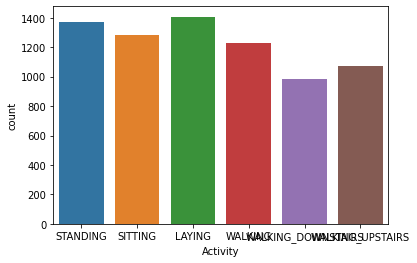

In [ ]:
# plt.figure(figsize=(12,4), dpi=150)
x_train = train[train.columns[:-2]]
y_train = train[train.columns[-1]]
sns.countplot(x=y_train)
y_train.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

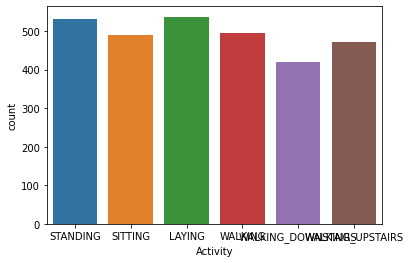

In [ ]:
x_test = test[test.columns[:-2]]
y_test = test[test.columns[-1]]
sns.countplot(x=y_test)
y_test.value_counts()

In [ ]:
# values are already scaled.
sc_Xtrain = x_train[x_train.columns[:-1]]
sc_Xtest = x_test[x_test.columns[:-1]]

In [ ]:
#LAbel Encoding of y values
le = LabelEncoder()
sc_Ytrain = pd.DataFrame(le.fit_transform(y_train))
sc_Ytest = pd.DataFrame(le.transform(y_test))

In [ ]:
lbs = le.classes_
lbs

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
# checking duplicate rows
duplicate_records_train = sc_Xtrain[sc_Xtrain.duplicated(sc_Xtrain.columns)]
duplicate_records_test = sc_Xtest[sc_Xtest.duplicated(sc_Xtest.columns)]
print("Number of duplicate rows",len(duplicate_records_test)+len(duplicate_records_train))

Number of duplicate rows 0


# PCA


* **PCA**  
*  tries to map in such a way that highest variance is preserved.
*   it finds the linear combination of variables for dimensional reduction.
* Eigen values --amount of variance 
* eigen vectors -- direction. so eigen vectors corresponding to higher eigen values are principle components.  

In [ ]:
#finding n_components

n=sc_Xtrain.shape[1]
pca = PCA(n_components=n)
pca.fit(sc_Xtrain)
var_ratios = pca.explained_variance_ratio_
cummulative_var = np.cumsum(var_ratios)

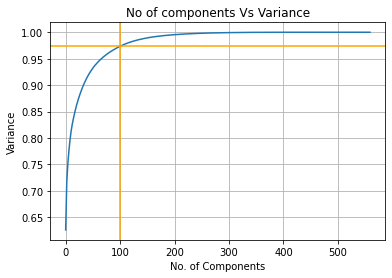

In [ ]:
plt.title("No of components Vs Variance")
plt.plot(np.arange(len(cummulative_var)),cummulative_var)
plt.xlabel("No. of Components")
plt.ylabel("Variance");
plt.axvline(x=100, ymin=0,ymax=1,c='orange')
plt.axhline(y=cummulative_var[100],xmin=0, xmax=sc_Xtrain.shape[1], color='orange')
plt.grid()

In [ ]:
n_components = 100
quality_retained = cummulative_var[n_components]* 100
print("Quality retained by ", n_components,"is " ,quality_retained)

Quality retained by  100 is  97.3483919769621


In [ ]:
pca100 = PCA(n_components)
pca_Xtrain = pd.DataFrame(pca100.fit_transform(sc_Xtrain) )

In [ ]:
pca_Xtrain.columns

RangeIndex(start=0, stop=100, step=1)

# Exploratory Data Analysis (EDA)

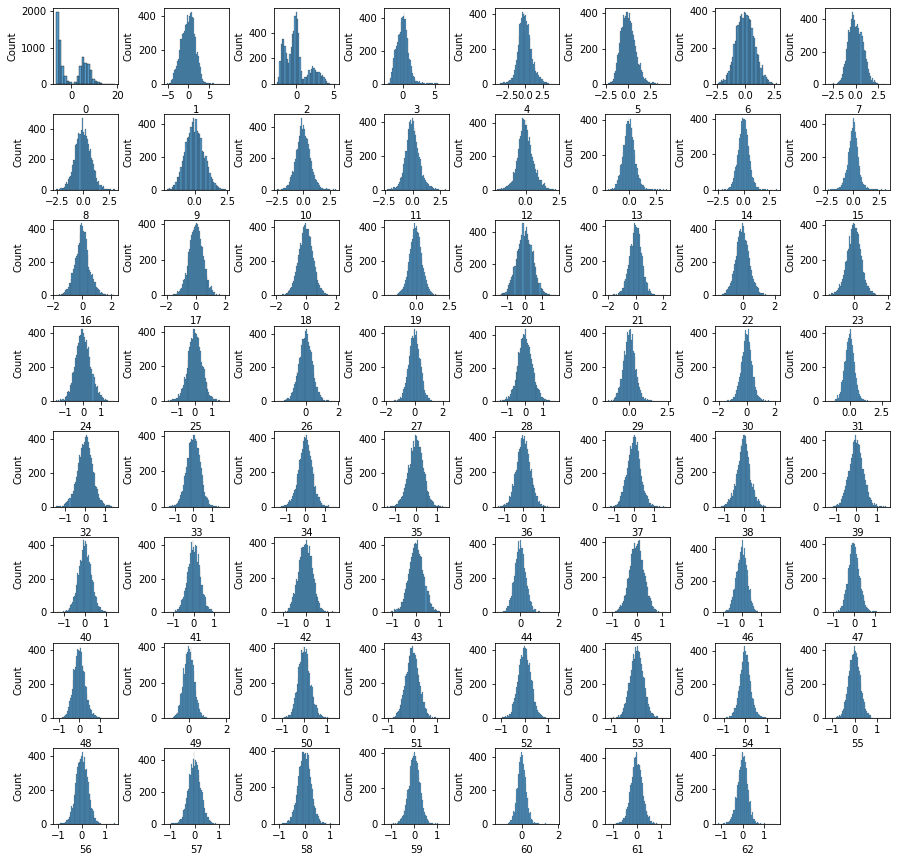

In [ ]:
#histogram plot for first 63 pricipal components
plt.figure(figsize=(15, 15))
for i in range(1,64):
  plt.subplot(8,8,i)
  sns.histplot(x= pca_Xtrain[pca_Xtrain.columns[i-1]]);
plt.subplots_adjust(wspace=0.7, hspace=0.4)


In [ ]:
pca_df = pca_Xtrain.loc[:,pca_Xtrain.columns[:10]]
pca_df['target'] = sc_Ytrain

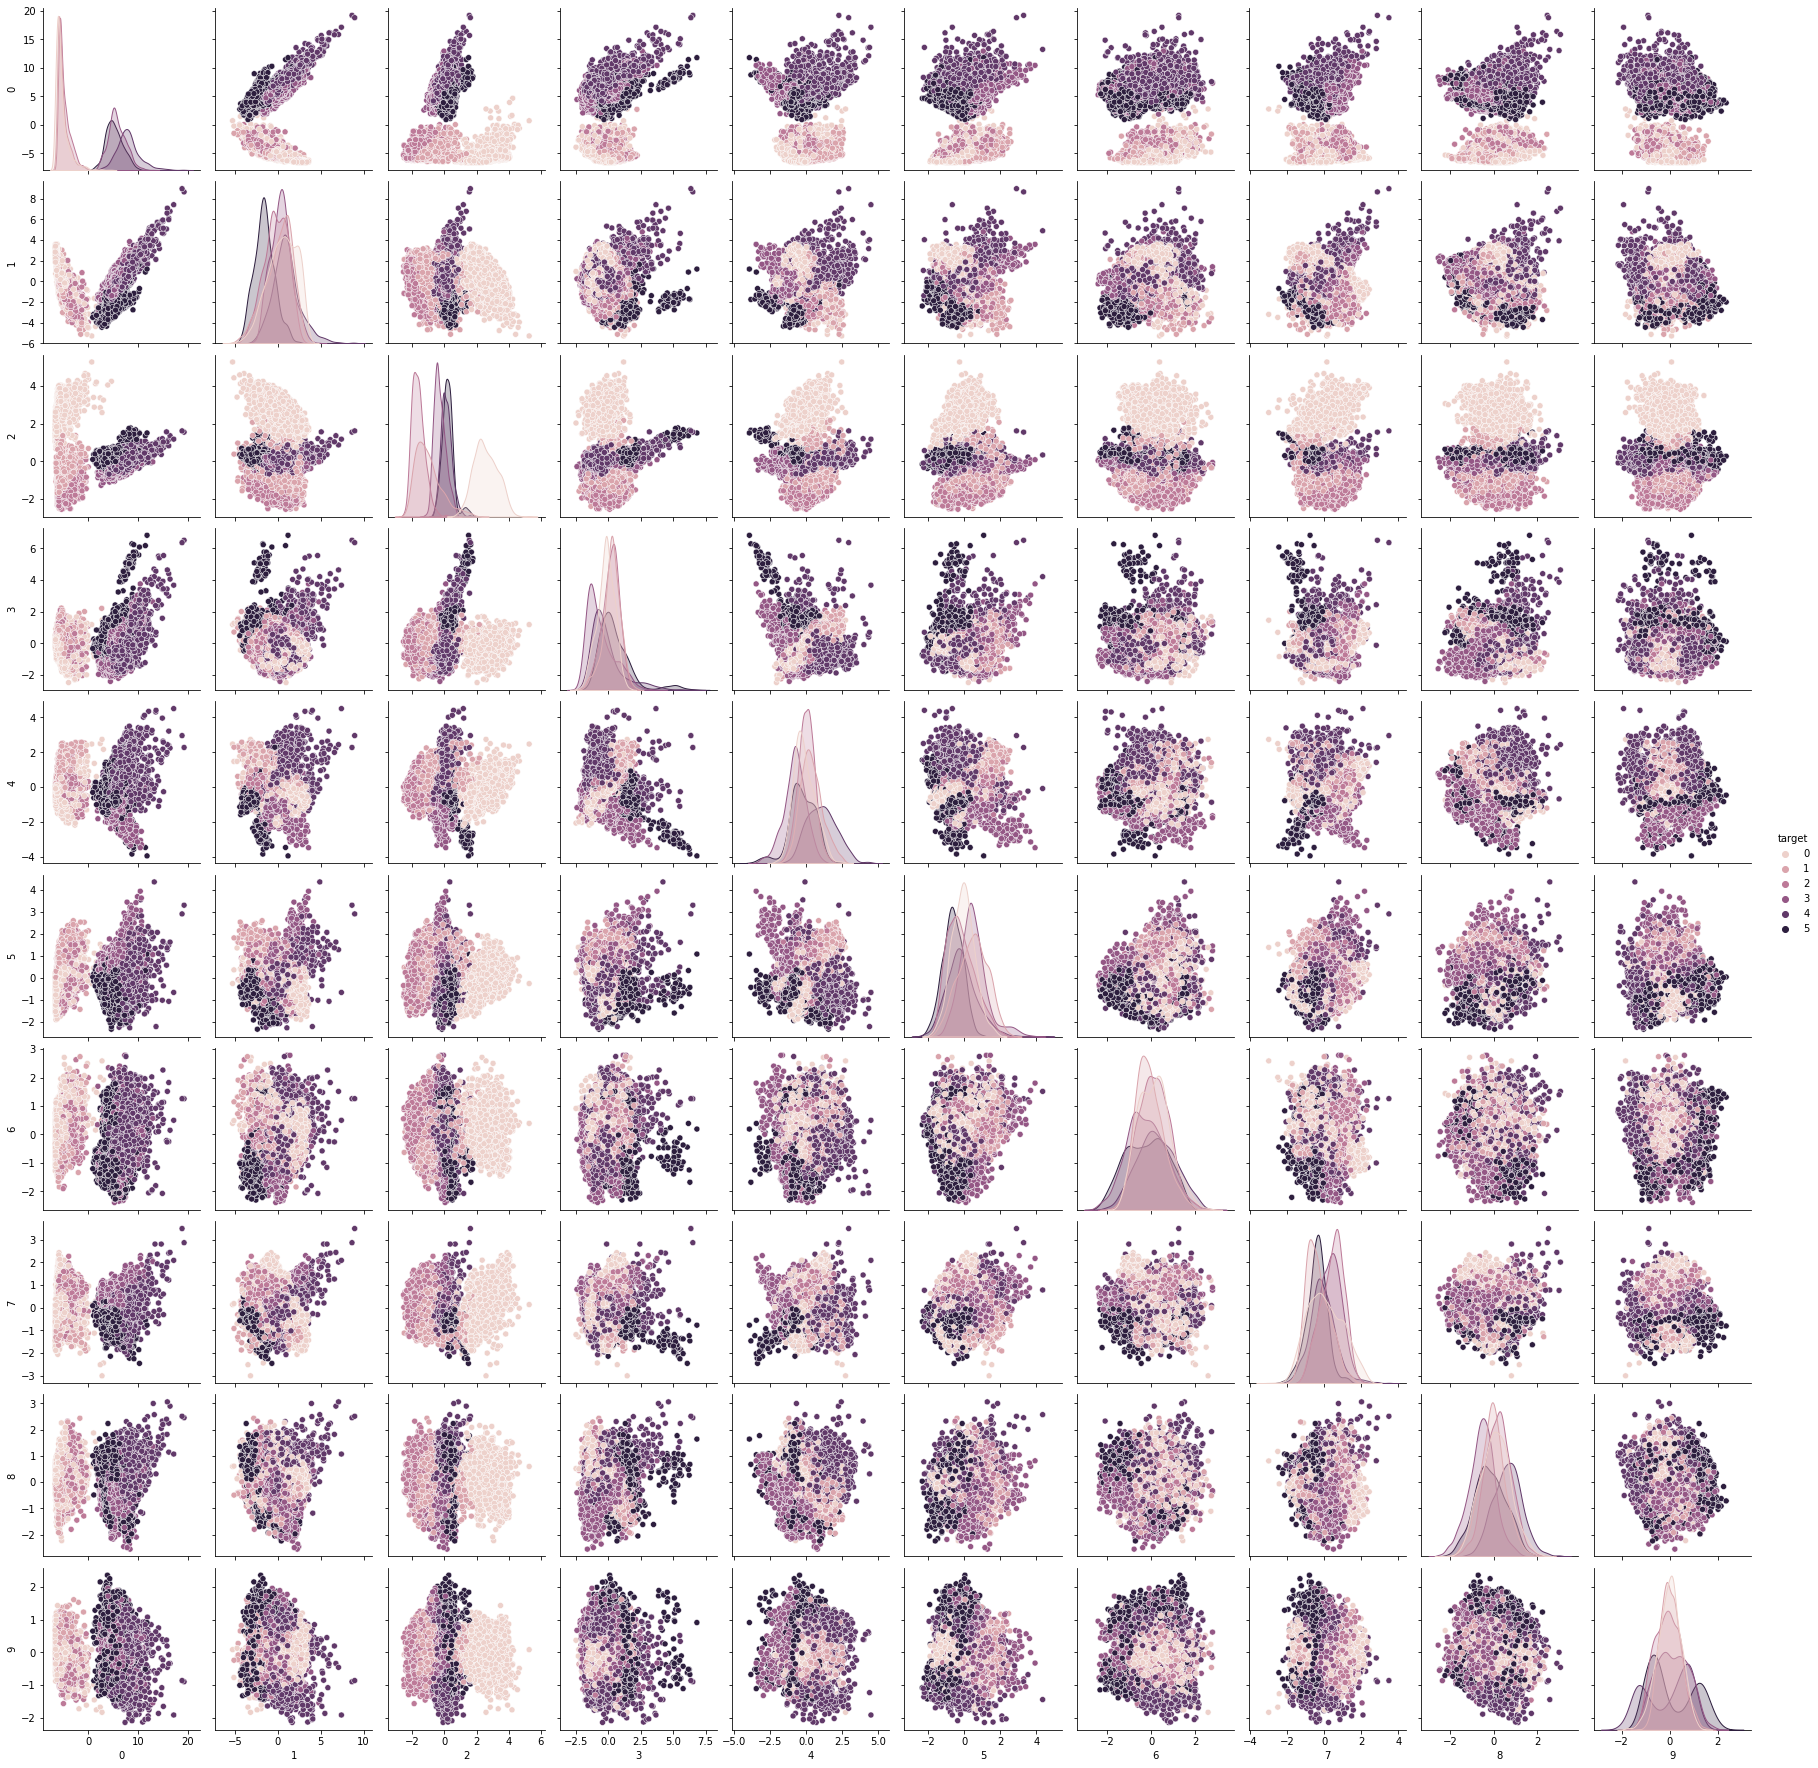

In [ ]:
#pairplot for 10 columns 
sns.pairplot(pca_df, hue="target"); 

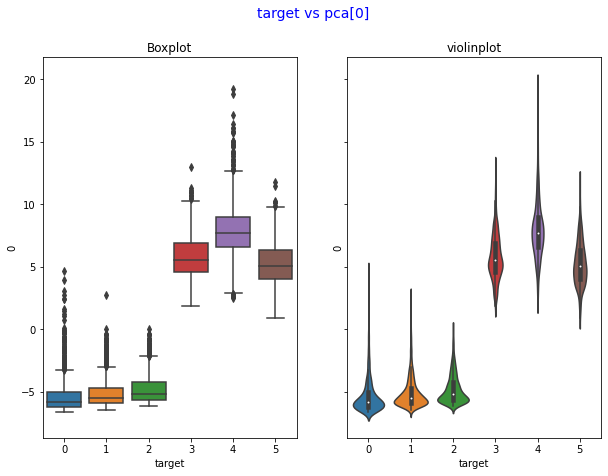

In [ ]:
#Box plot and Violinplot
cols = pca_df.columns

fig, axes = plt.subplots(1,2, figsize=(10,7),  sharey=True)
fig.suptitle("target vs pca[0]", color='b', fontsize=14)

sns.boxplot(ax=axes[0], y=cols[0], x="target", data=pca_df)
axes[0].set_title("Boxplot")

#voilin plot ----in addition to boxplot it represents the full distribution of data
sns.violinplot(ax=axes[1], x="target", y=cols[0], data=pca_df)
axes[1].set_title("violinplot");

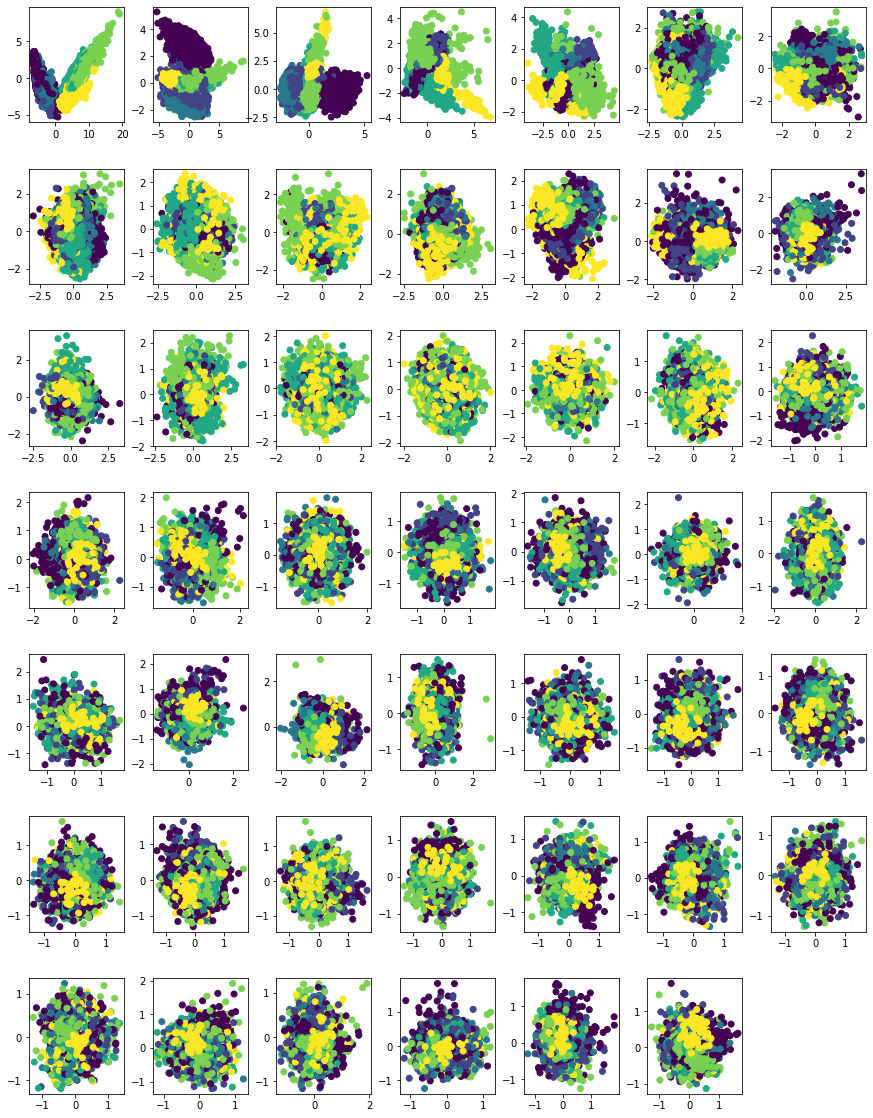

In [ ]:
#scatter plot for first 48 principal components
plt.figure(figsize=(15, 20))
for i in range(1,49):
  plt.subplot(7,7,i)
  plt.scatter(pca_Xtrain[i-1], pca_Xtrain[i],c=sc_Ytrain)
plt.subplots_adjust(wspace=0.3, hspace=0.4)


#LDA


*   **LDA**

*   Discriminant Analysis - method in statistics which tries to find a linear combination of features that seperates two or more classes of objects.
*LDA and PCA both look for linear combination of variables. difference is LDA explicitly tries to do between the classes of data. On contrast, PCA doesnt account into any difference in class. 


In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd', n_components=5)
lda_df = lda.fit_transform(sc_Xtrain, sc_Ytrain[0].ravel())
lda_df[0:4]

array([[-1.02099689e+01, -8.50050571e+00,  4.92769161e-01,
         1.06744174e+00,  4.24474879e+00],
       [-9.76337287e+00, -6.98199819e+00,  4.30862160e-01,
        -4.26489293e-01,  2.24459012e+00],
       [-9.81835869e+00, -7.07908141e+00, -2.07152429e-01,
        -4.64591030e-03,  3.93928319e+00],
       [-9.74409873e+00, -8.13931247e+00,  2.03197054e-01,
        -2.91829889e-02,  1.82270014e+00]])

In [ ]:
y = le.inverse_transform(sc_Ytrain[0])

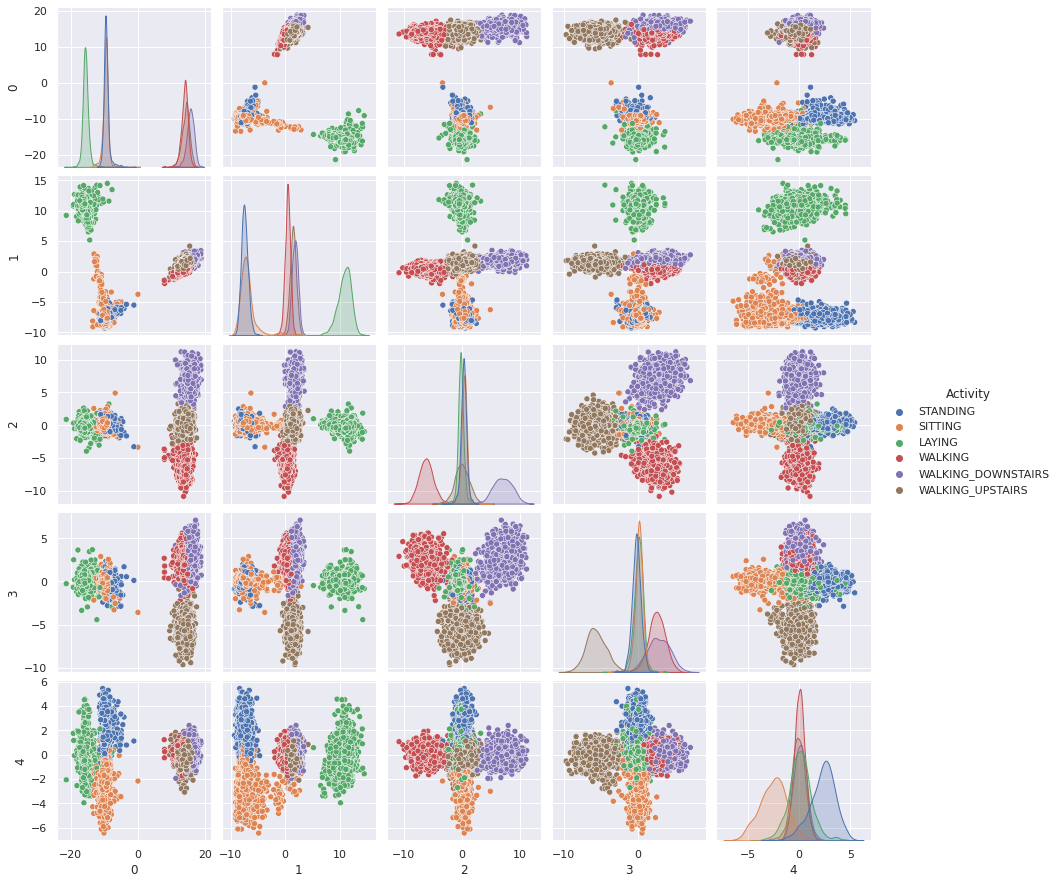

In [ ]:
lda_df = pd.DataFrame(lda_df)
lda_df['Activity'] = y
sns.set_theme( )
sns.pairplot(data = lda_df, hue='Activity');

# Correlation

correlation formula
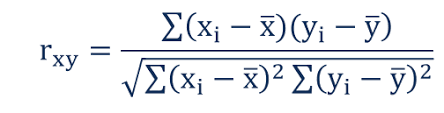

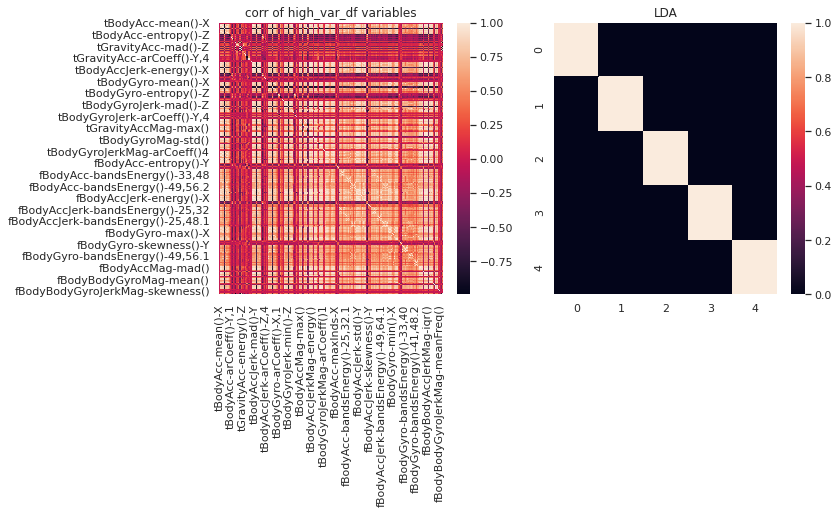

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(121)
plt.title("corr of high_var_df variables")
sns.heatmap(sc_Xtrain.corr())

plt.subplot(122)
sns.heatmap(lda_df.corr())
plt.title("LDA")
plt.subplots_adjust(wspace=0.2)

# t- distributed Stochastic Neighbor Embedding


* **t- SNE**
* TSNE - t-distributed Stochastic Neighborhood Embedding .(embedding is a relatively low dimesional space you will map)
* ** step 1:** converts the euclidean distances into probabilities by mapping the points on normal curve--  prob is high for similar obj and low for disimilar. 
*  finds similarities between points
* **step 2:** now randomly projects the data on number line and calculates similarities on number line.
* Now instead of using bell curve t-distribution curve is used for mapping. Similarity scores are calculated. 
*t-Distribution is a lot like a normal distribution. The only difference is that t-distribution is not as tall as normal distribution in middle but its tails are taller at the ends.
* t-Distribution is used instead of normal distribution in lower dimension because without it the clusters would all clump up in the middle and will be harder to visualize.
* **step 3**: Moves one point at a time in small steps to make the similarity matrix after mapping equal to before mapping.


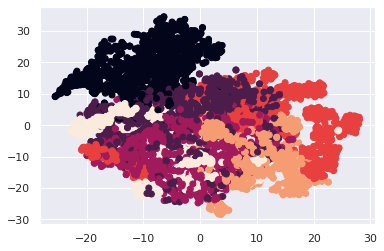

In [ ]:
tsne3 = TSNE(n_components=3)
Xtrain_tsne3 = tsne3.fit_transform(sc_Xtrain)
plt.scatter(Xtrain_tsne3.T[0],Xtrain_tsne3.T[1],c=sc_Ytrain)
#its cost expensive in terms of computation

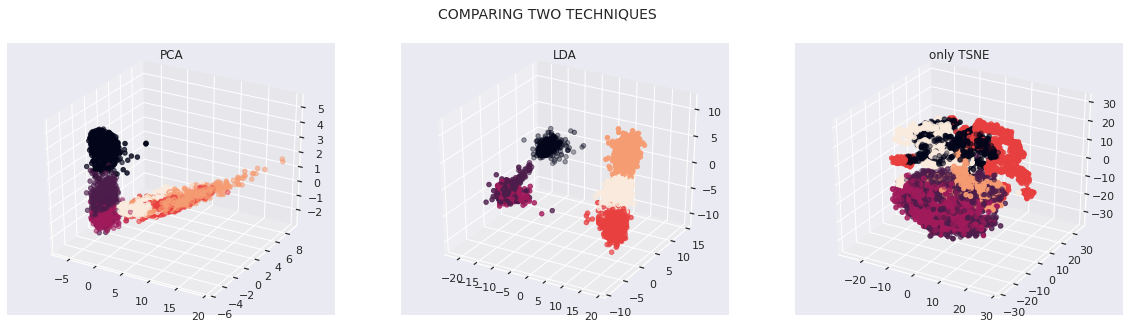

In [ ]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle("COMPARING TWO TECHNIQUES", fontsize=14)

#########pca#############
x= pca_Xtrain[0]
y = pca_Xtrain[1]
z= pca_Xtrain[2]
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x, y, z, c= sc_Ytrain, label='pca')
plt.title("PCA")

#########lda#############
x= lda_df[0]
y = lda_df[1]
z= lda_df[2]
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(x, y, z, c= sc_Ytrain, label='pca')
plt.title("LDA")

###########tsne without pca#############
x= Xtrain_tsne3.T[0]
y = Xtrain_tsne3.T[1]
z= Xtrain_tsne3.T[2]
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(x, y, z, c= sc_Ytrain, label='tsne')
plt.title("only TSNE");
plt.show()

# ICA

**ICA **
* PCA is about finding the correlation by maximizing variance --for reconstruction
* ICA tries to maximize independence (tries to find the linear transformation of feature space into a new feature space such that each of the individual new features are mutually independent)
*In other words,
*Mutual Information,

1.  I(new_Xi, new_Xj)=0 and 
2.  I(new_x, X) as max as possible.

In [ ]:
ica = FastICA(n_components = 3, random_state= 0)
Xica = ica.fit_transform(sc_Xtrain, sc_Ytrain)

In [ ]:
lbs

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
fig = px.scatter_3d(Xica, x=0, y=1, z=2, color=sc_Ytrain, title='ICA')
fig.show()

In [ ]:
fig = px.scatter_3d(lda_df, x=0, y=1, z=2, color=sc_Ytrain, title='LDA')
fig.show()

# ICA on LDA

In [ ]:
ldaica = FastICA(n_components = 3, random_state= 0)
Xldaica = ldaica.fit_transform(lda_df[lda_df.columns[:-1]], sc_Ytrain)
fig = px.scatter_3d(Xldaica, x=0, y=1, z=2, color=sc_Ytrain, title='ICA on LDA')
fig.show()

In [ ]:
print(sc_Ytrain[sc_Ytrain.columns[0]].unique())
a=sc_Ytrain[sc_Ytrain.columns[0]].unique()
print(le.inverse_transform(a))

[2 1 0 3 4 5]
['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


* So LDA is used further
* There is some overlapping between 2 and 1 i.e, STANDING and SITTING classes.

# Classical ML models

In [ ]:
y = le.transform(lda_df['Activity'])

In [ ]:
transformed_Xtrain = lda_df[lda_df.columns[:-1]]
transformed_Ytrain = y

# Logistic Regression

In [ ]:
parameters = { 'penality':['l2','l1']} # penality -- regularization
t1_start = time.perf_counter()  
log_reg = linear_model.LogisticRegression()#(max_iter= 150, solver='lbfgs')  #lbfgs is like svd but multidim.
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1) 
log_reg_grid_results = log_reg.fit(transformed_Xtrain, y)
t1_end = time.perf_counter()  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
xtest = lda.transform(sc_Xtest)

In [ ]:
lr_pred = log_reg_grid_results.predict(xtest)
confusion_matrix(sc_Ytest, lr_pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 429,  61,   0,   0,   1],
       [  0,  18, 514,   0,   0,   0],
       [  0,   0,   0, 491,   0,   5],
       [  0,   0,   0,   1, 413,   6],
       [  0,   0,   0,  12,   0, 459]])

In [ ]:
lr_time = t1_end - t1_start

In [ ]:
print(classification_report(sc_Ytest, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.87      0.91       491
           2       0.89      0.97      0.93       532
           3       0.97      0.99      0.98       496
           4       1.00      0.98      0.99       420
           5       0.97      0.97      0.97       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.96      0.96      2947



# SVM

In [ ]:
parameters = {'kernel':['linear', 'rbf'],'C':[0.125, 0.5, 1, 2, 8, 16], 'gamma': [1e-3, 1e-4]}
t1_start = time.perf_counter()
svc = svm.SVC(tol = 0.00005)
lr_svc_grid = GridSearchCV(svc, parameters, verbose=1)
lr_svc_grid_results = svc.fit(transformed_Xtrain, transformed_Ytrain)
t1_end = time.perf_counter()

In [ ]:
svm_pred = lr_svc_grid_results.predict(xtest)

In [ ]:
cm = confusion_matrix(sc_Ytest, svm_pred)
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 433,  57,   0,   0,   1],
       [  0,  22, 510,   0,   0,   0],
       [  0,   0,   0, 490,   0,   6],
       [  0,   0,   0,   1, 410,   9],
       [  0,   0,   0,   9,   0, 462]])

In [ ]:
svm_time = t1_end - t1_start

In [ ]:
print(classification_report(sc_Ytest, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.95      0.88      0.92       491
           2       0.90      0.96      0.93       532
           3       0.98      0.99      0.98       496
           4       1.00      0.98      0.99       420
           5       0.97      0.98      0.97       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.96      0.96      2947



# K Nearest Neighbor

In [ ]:
#  Elbow Method -- testing different k values in a range and picking the best

In [ ]:
neighbors =range(15)
p = range(5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
parameters = {'n_neighbors':neighbors, 'p':p }
start = time.perf_counter()
knn_clf= KNeighborsClassifier( )
knn_grid = GridSearchCV(knn_clf, parameters, verbose=1)
end = time.perf_counter()
knn_results = knn_clf.fit(transformed_Xtrain, transformed_Ytrain) 


In [ ]:
knn_pred = knn_results.predict(xtest)

In [ ]:
knn_cm = confusion_matrix(sc_Ytest, svm_pred)
knn_cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 433,  57,   0,   0,   1],
       [  0,  22, 510,   0,   0,   0],
       [  0,   0,   0, 490,   0,   6],
       [  0,   0,   0,   1, 410,   9],
       [  0,   0,   0,   9,   0, 462]])

In [ ]:
knn_time = end - start

In [ ]:
print(classification_report(sc_Ytest, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.87      0.92       491
           2       0.89      0.97      0.93       532
           3       0.98      0.99      0.98       496
           4       1.00      0.98      0.99       420
           5       0.97      0.99      0.98       471

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



# Decision Tree

In [ ]:
parameters = {'max_depth': np.arange(3,15,1), 'min_samples_split': range(1,51), 'min_leaf_split': range(2,51)}
start = time.perf_counter()
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=parameters, verbose=1)
dt_model = dt.fit(transformed_Xtrain, transformed_Ytrain)
end = time.perf_counter()

In [ ]:
dt_pred = dt_model.predict(xtest)

In [ ]:
confusion_matrix(sc_Ytest, dt_pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 427,  64,   0,   0,   0],
       [  0,  41, 491,   0,   0,   0],
       [  0,   0,   0, 493,   0,   3],
       [  0,   0,   0,   2, 411,   7],
       [  0,   0,   0,  17,   0, 454]])

In [ ]:
dt_time = end - start

In [ ]:
accuracy_score(sc_Ytest, dt_pred)

0.9545300305395318

In [ ]:
print(classification_report(sc_Ytest, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.87      0.89       491
           2       0.88      0.92      0.90       532
           3       0.96      0.99      0.98       496
           4       1.00      0.98      0.99       420
           5       0.98      0.96      0.97       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.95      0.95      0.95      2947



# Accuracies

In [ ]:
no_of_models = 4
diff_model_acc = []
predicted_val4model =[lr_pred, svm_pred, dt_pred, knn_pred]
for i in range(no_of_models):
  acc  = accuracy_score(sc_Ytest, predicted_val4model[i])
  diff_model_acc.append(acc*100)

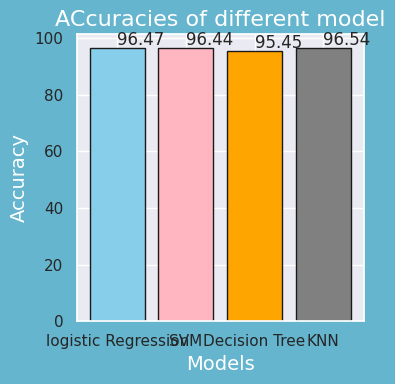

In [ ]:
fig = plt.figure(facecolor='c', figsize=(4,4), dpi=100, edgecolor='c') #dpi for resolution in dots per inch
X_values = ['logistic Regression', 'SVM', 'Decision Tree', 'KNN']
Y_values = [round(x,2) for x in diff_model_acc]

plt.bar(X_values, Y_values, edgecolor='k', color=['skyblue','lightpink', 'orange','gray']) ## Bar plot
plt.title("ACcuracies of different model", fontsize=16, color='white')
plt.xlabel("Models", size=14, color='w')
plt.ylabel("Accuracy", size=14, color='w');
for index,data in enumerate(Y_values):
    plt.text(x=index , y =data+1 , s=f"{data}") #data +i -- i is the distance from top the bar where u want to display the text
plt.tight_layout()

# Confusion Matrix

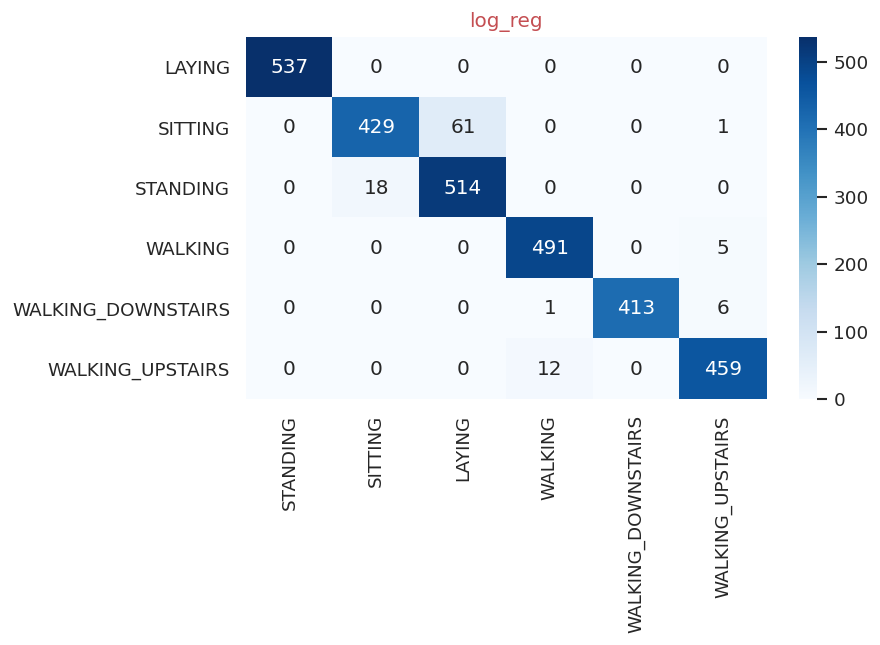

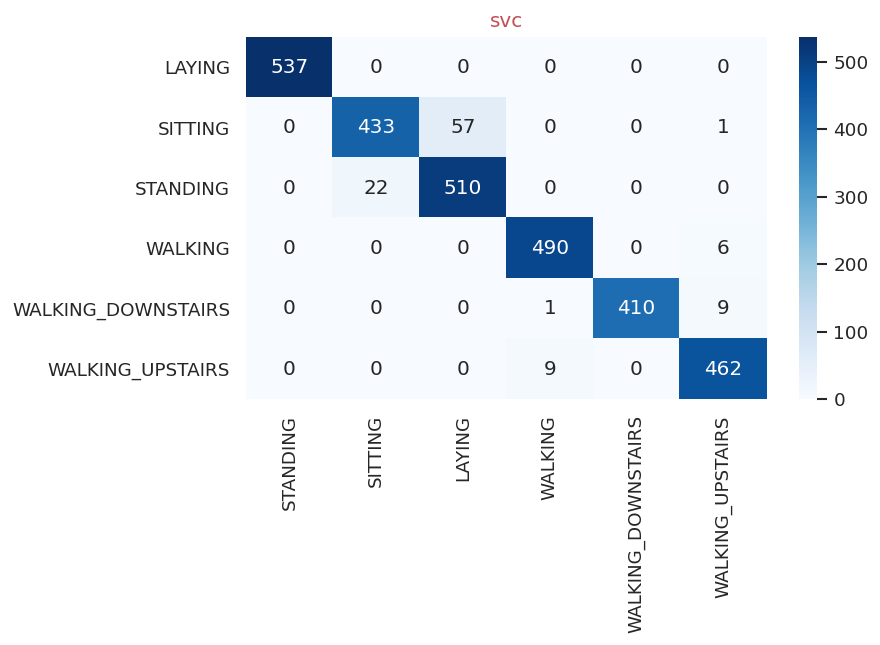

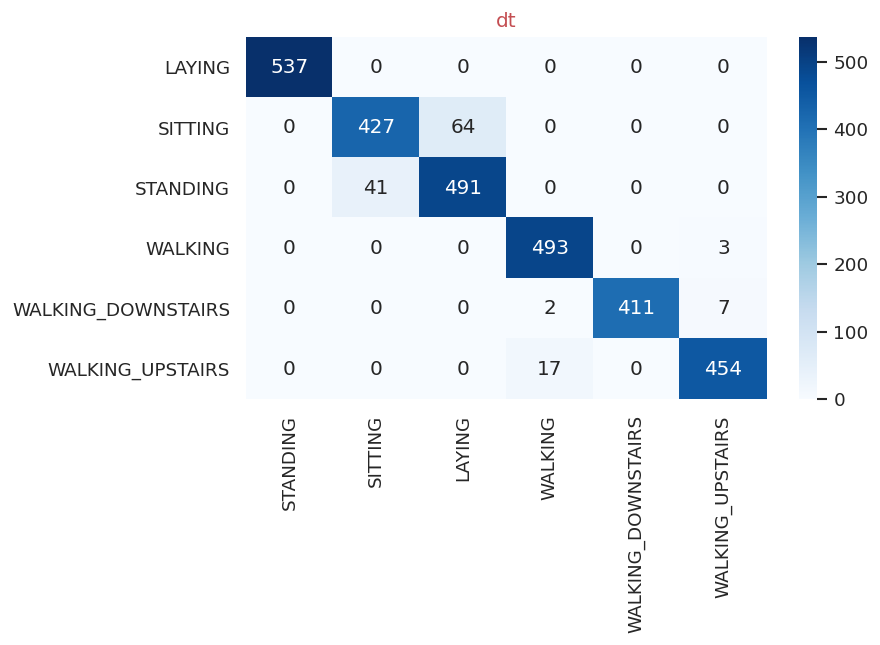

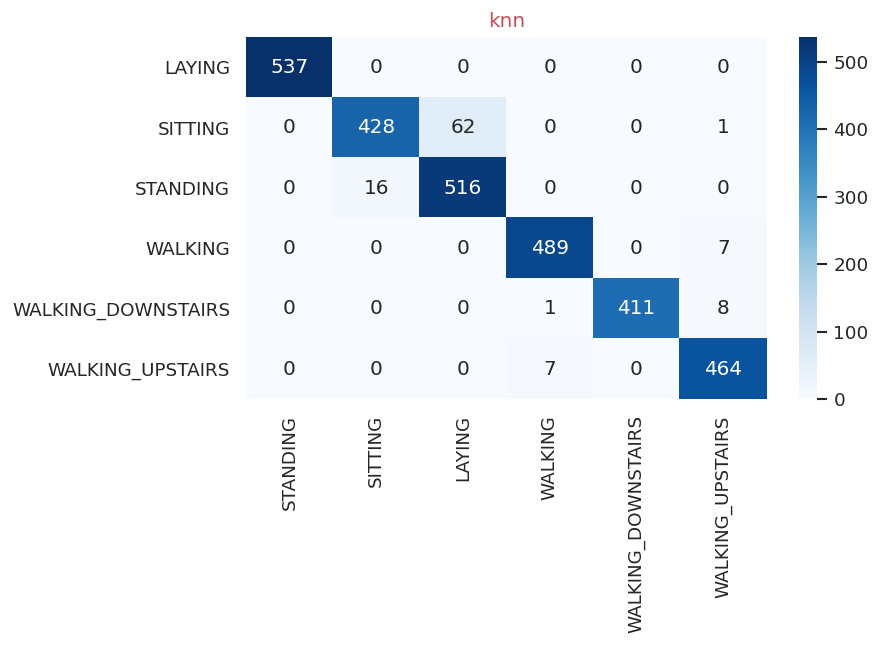

In [ ]:
no_of_models = 4
diff_model_cm = []
model_names=['log_reg', 'svc', 'dt', 'knn']
predicted_val4model =[lr_pred, svm_pred, dt_pred, knn_pred]
for i in range(no_of_models):
  conf_mat  = confusion_matrix(sc_Ytest, predicted_val4model[i])
  diff_model_cm.append(conf_mat)

  df_cm = pd.DataFrame(conf_mat, index=lbs, columns=train['Activity'].unique())
  plt.figure(figsize = (7,4), dpi=120) #width, height  #fiqsize - fig size in inches dpi --no of pixels for inch
  plt.xlabel("Actual")
  plt.ylabel('Predicted')
  plt.title(model_names[i], fontsize=12, color='r' )
  sns.heatmap(df_cm, annot=True, cmap = plt.cm.Blues, fmt='g')
  print("\n")

# Time taken for training

['logistic Regr', 'SVM', 'Decision Tree', 'KNN']
[0.742117414000063, 0.10579715799997302, 0.030942327000047953, 0.0002195740000843216]


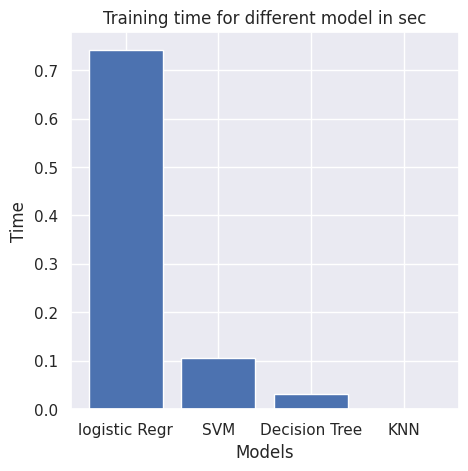

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
X_values = ['logistic Regr', 'SVM', 'Decision Tree', 'KNN']
Y_values = [lr_time, svm_time, dt_time, knn_time]

plt.bar(X_values, Y_values) 
plt.title("Training time for different model in sec")
plt.xlabel("Models")
plt.ylabel("Time")

print(X_values)
print(Y_values)
# print(knn_time) ##knn time is too small so it is not displayed

# Basic Ensemble - Max Voting

In [ ]:
results = [lr_pred, svm_pred, dt_pred, knn_pred]
combined_results = np.array(results)

In [ ]:
ense_pred = mode(combined_results)
ense_pred[0]

array([[2, 2, 2, ..., 5, 5, 5]])

In [ ]:
ense_results = pd.DataFrame(ense_pred[0].T)
(ense_results==sc_Ytest).value_counts()
print("wrongly classified are ",(ense_results==sc_Ytest).value_counts()[0])

wrongly classified are  False    101
dtype: int64


In [ ]:
print("test accuracy is ",accuracy_score(sc_Ytest, ense_results))

test accuracy is  0.9657278588394977


In [ ]:
confusion_matrix(sc_Ytest, ense_results)

array([[537,   0,   0,   0,   0,   0],
       [  0, 435,  55,   0,   0,   1],
       [  0,  22, 510,   0,   0,   0],
       [  0,   0,   0, 491,   0,   5],
       [  0,   0,   0,   1, 413,   6],
       [  0,   0,   0,  11,   0, 460]])

In [ ]:
# Classification Report

# Precision – Accuracy of positive predictions.
# Precision = TP/(TP + FP)

# Recall: Fraction of positives that were correctly identified.
# Recall = TP/(TP+FN)

# The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

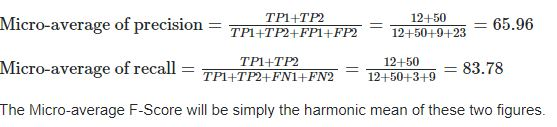
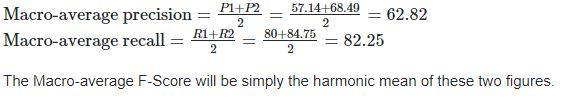

# Final Note

* LDA dimensionality reduction is best.
* Among all the classical ML models - SVM, KNN has best results in all the perspectives.
*So anyone of them can be used for predictions.